In [33]:
%matplotlib inline
from scipy.special import factorial

In [34]:
def expected_sky_count(mu_n, k):
    k = int(k)
    mu_s_list = np.zeros(k+1)
    weights_list = np.zeros(k+1)
    mu_s_bar_0 = (-1. * mu_n + np.sqrt(mu_n**2 + 4.) )/2.
    # zero-count prob
    prob_0 = (1. - mu_n/np.sqrt(mu_n**2 + 4.) )**k
    mu_s_list[0] = mu_s_bar_0
    weights_list[0] = prob_0
    for k_n in np.arange(1,k+1):
        mu_s_bar = (k -k_n) / k_n * mu_n
        prob = factorial(k) / (factorial(k_n) * factorial(k - k_n))*(k-k_n)**(k-k_n)*(k_n)**(k_n)/(k)**(k)
        #prob = (k_n**k_n * (k - k_n)**(k - k_n))/(k**k)
        mu_s_list[k_n] = mu_s_bar
        weights_list[k_n] = prob
    mu_s_star = np.average(mu_s_list,weights=weights_list)
    err_mu = np.sqrt(np.cov(mu_s_list,aweights = weights_list))
    return mu_s_star, err_mu


In [35]:
mu_n_list = np.linspace(0.1, 2., 100)

In [36]:
k = 10
mu_starlist = np.zeros_like(mu_n_list)
errlist = np.zeros_like(mu_n_list)
for i, mu_n in enumerate(mu_n_list):
    mu_starlist[i], errlist[i] = expected_sky_count(mu_n, k)
    

Text(0, 0.5, 'mu_star')

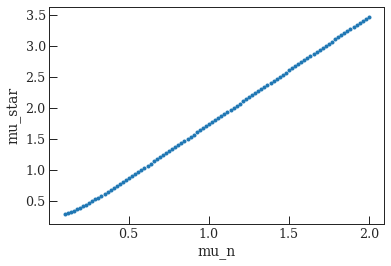

In [38]:
plt.plot(mu_n_list, mu_starlist,'.')
plt.xlabel('mu_n')
plt.ylabel('mu_star')

Text(0, 0.5, 'err_mu_star')

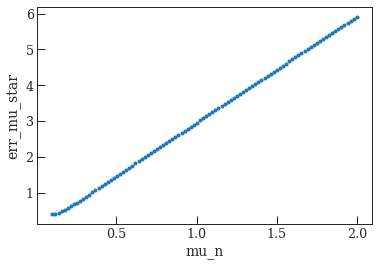

In [39]:
plt.plot(mu_n_list, errlist,'.')
plt.xlabel('mu_n')
plt.ylabel('err_mu_star')